<a href="https://colab.research.google.com/github/ady909/Stock-Prediction-Using-LSMT/blob/main/Stock_Price_Prediction_using_LSMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Price Prediction using LSMT**



##**Problem Statement**

Stock price prediction is a challenging task due to the complex and dynamic nature of financial markets. Traditional methods often struggle to capture the non-linear patterns and dependencies present in stock price movements. Machine learning techniques, particularly deep learning models like LSTMs, have shown promise in capturing such intricate patterns.

## **Objective:**

Design and implement a predictive model using LSTM neural networks to forecast the future closing prices of a given stock based on historical data.

##  **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
from google.colab import files
upload = files.upload()

Saving GOOG.csv to GOOG.csv


##**Loading Data**

In [3]:

# loading dataset

data = pd.read_csv('GOOG.csv')
df = pd.DataFrame(data)
df


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


##**Data Analysis**

In [4]:
#shape of dataset
df.shape

(1258, 14)

**There are 1258 datapoints and 14 columns.**

In [5]:
#overall summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


**No null values found.**

**column 'symbol' is of no use with respect to our analysis so will drop that column.**

In [6]:
#dropping  symbol column
df = df.drop(['symbol'],axis=1)

In [7]:
#formatting date column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [8]:
# Resample data to hourly basis
df1 = df.set_index('date').resample('m').first()
df1


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-30 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
2016-07-31 00:00:00+00:00,699.21,700.6500,692.1301,692.20,1344710,699.21,700.6500,692.1301,692.20,1344710,0.0,1.0
2016-08-31 00:00:00+00:00,772.88,780.4300,761.0900,761.09,2700470,772.88,780.4300,761.0900,761.09,2700470,0.0,1.0
2016-09-30 00:00:00+00:00,768.78,771.0200,764.3000,769.25,925131,768.78,771.0200,764.3000,769.25,925131,0.0,1.0
2016-10-31 00:00:00+00:00,772.56,776.0650,769.5000,774.25,1278821,772.56,776.0650,769.5000,774.25,1278821,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 00:00:00+00:00,1901.35,1922.3918,1850.9300,1853.57,1602182,1901.35,1922.3918,1850.9300,1853.57,1602182,0.0,1.0
2021-03-31 00:00:00+00:00,2081.51,2086.5200,2046.1000,2056.52,1405115,2081.51,2086.5200,2046.1000,2056.52,1405115,0.0,1.0
2021-04-30 00:00:00+00:00,2137.75,2142.9400,2096.8900,2097.95,1698978,2137.75,2142.9400,2096.8900,2097.95,1698978,0.0,1.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


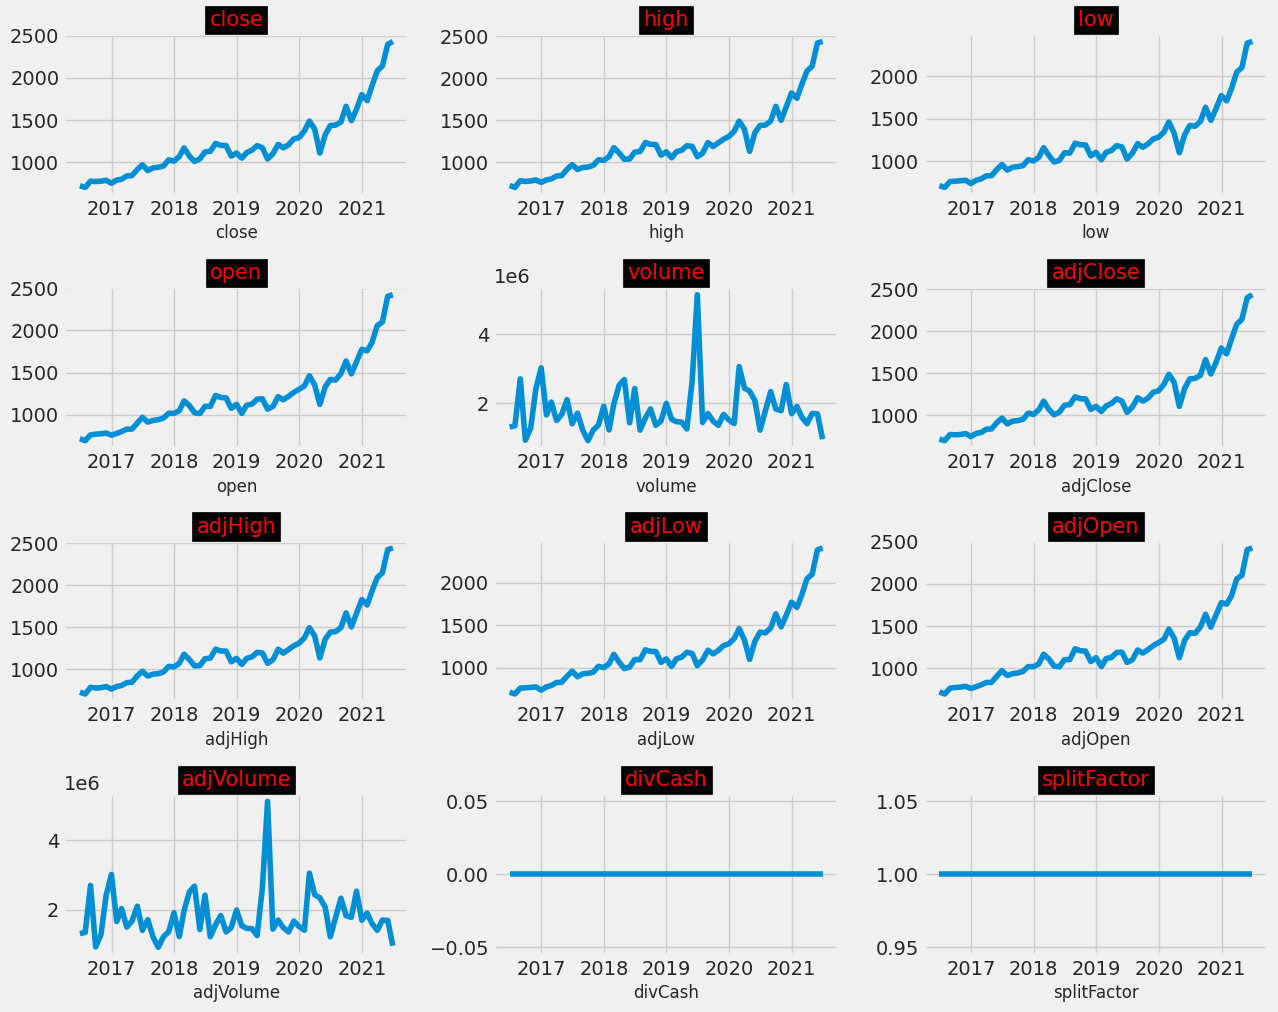

In [10]:
plt.figure(figsize=(13, 20))

for idx, column in enumerate(df1.columns):
    plt.subplot(8, 3, idx + 1)
    plt.plot(df1.index.values, df1[column])
    plt.title(column, backgroundcolor='black', color='red', fontsize=15)
    plt.xlabel(column, size=12)

plt.tight_layout()
plt.show()

**Observations**
* Closing Price is the parameter to judge performance of stocks year on year. And it looks like Google stocks are performing well and increasing every year.
*  Looking at Volume's line chart it looks like , company stocks were at its strongest point in between 2019 and 2020. Thats the stongest phase of Google stocks in recent years.
*  the "Adjusted Close" price is high in the stock market, it generally indicates that the closing price of the stock has been adjusted for certain factors such as dividends, stock splits, or other corporate actions.
If its positive then company performance is good. And as you can see its increasing year on year.

**Analyzing Daily Returns**

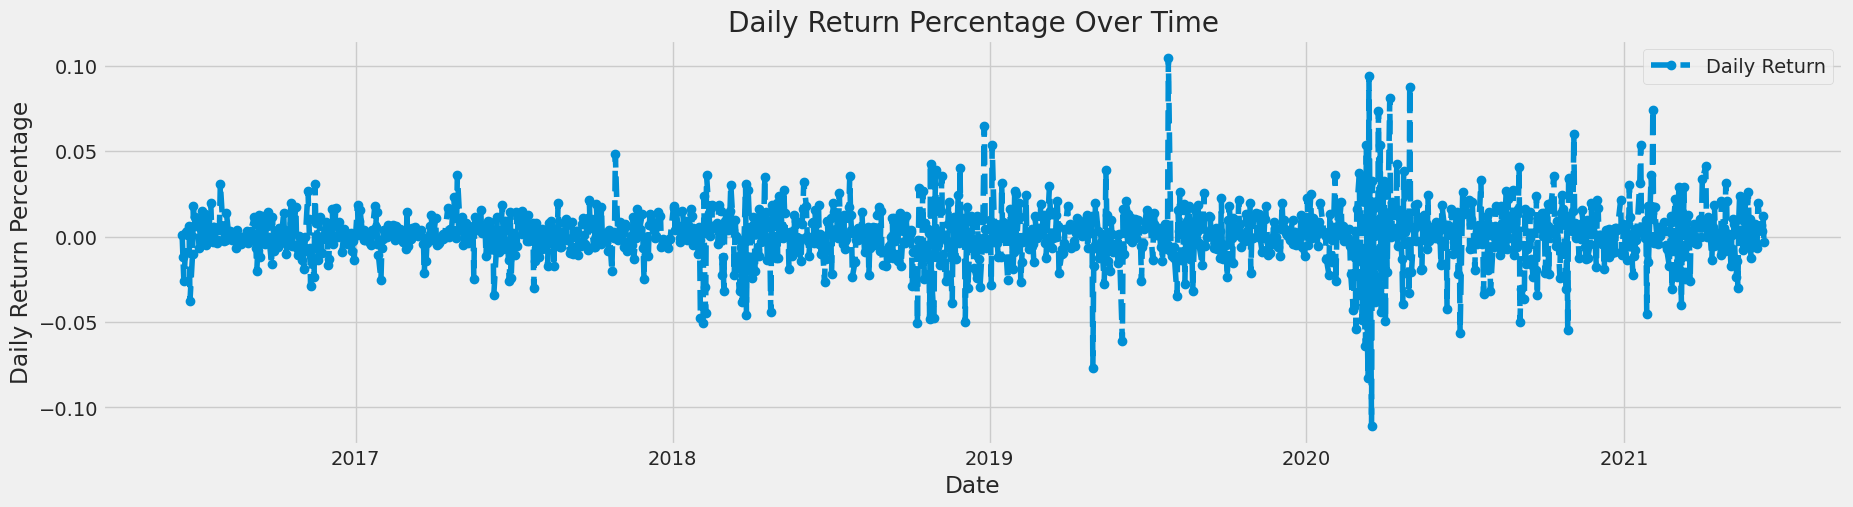

In [11]:
df['Daily Return'] = df['adjClose'].pct_change()

# Plotting the daily return percentage
plt.figure(figsize=(20, 5))
plt.plot(df['date'], df['Daily Return'], linestyle='--', marker='o', label='Daily Return')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage')
plt.title('Daily Return Percentage Over Time')
plt.show()

**Observations:**
* Peaks and troughs in the daily returns graph can indicate periods of high volatility. Sharp spikes or dips may suggest significant market events or news affecting the stock. You can see spikes or dips between 2020 and 2021 , that could be due to all shocking corona news .
* Sudden extreme spikes or dips can be considered as outliers which we all can se somewhere in between 2019 and 2020.
* Upward trend shows positive performance while downward trend shows negetive performance.

##**How much value do we put at risk by investing in a particular stock?**

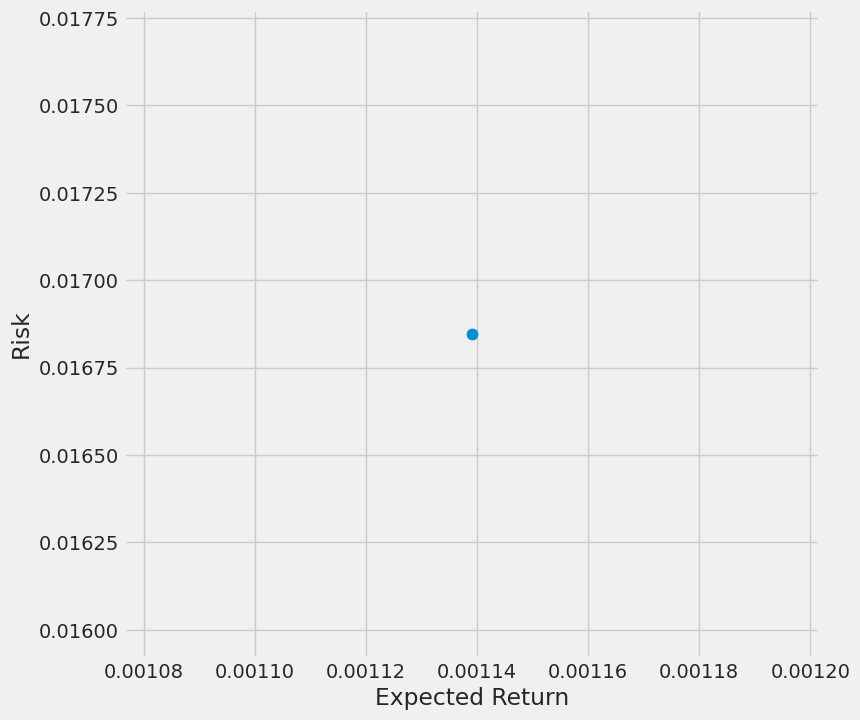

In [14]:
adjusted_close_returns = df['adjClose'].pct_change()

# Remove NaN values
returns = adjusted_close_returns.dropna()

# Set marker area
marker_area = np.pi * 20

# Create a scatter plot
plt.figure(figsize=(8,8))
plt.scatter(returns.mean(), returns.std(), s=marker_area)

# Label the axes
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Display the plot
plt.show()

## **Modeling by LSTM**

In [26]:
# Create a new dataframe with only the 'Close' column
data = df['close'].to_frame()

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(len(dataset) * 0.8)
training_data_len

1006

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [28]:
train = scaled_data[0:int(training_data_len), :]

time_step = 30

##### Create the training data set

x_train = []
y_train = []

for i in range(time_step, len(train)):
    x_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


# Create the testing data set
test = scaled_data[training_data_len-time_step:, :]

# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:, :]

for i in range(time_step, len(test)):
    x_test.append(test[i-time_step:i, 0])


# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598])]
[0.03966352639019283]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.

In [29]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
MODEL = model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
16/16 [==============================] - 7s 199ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 3472293.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 113ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 3472089.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 1s 84ms/step - loss: 5.4592e-04 - accuracy: 0.0000e+00 - val_loss: 3471874.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 1s 86ms/step - loss: 4.7953e-04 - accuracy: 0.0000e+00 - val_loss: 3471910.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 1s 84ms/step - loss: 4.3168e-04 - accuracy: 0.0000e+00 - val_loss: 3471985.2500 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 1s 87ms/step - loss: 4.0873e-04 - accuracy: 0.0000e+00 - val_loss: 3471954.7500 - val_accuracy: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 

In [30]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 20ms/step


## **Evaluation**

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

r2Score_test = r2_score(y_test, predictions)
print('test R2 Score: %.2f ' % (r2Score_test))

test R2 Score: 0.95 


**Insights:**
* R-squared (R2) score of 0.95 indicates a very good fit for your model.
* An R2 score of 0.95 suggests that your model is highly effective in predicting the target variable based on the features used for training
* R2-squared score explains 95 % variance in the target variable.
* While a high R2 score is generally positive, it's important to assess the possibility of overfitting.

In [32]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

69.95150948853514

**Insights**
* Lower RMSE means better Accuracy.
*  RMSE of 69.95 might be acceptable, while it needs improvement.
* RMSE is sensitive to outliers. If your dataset contains extreme values, they can have a significant impact on the RMSE.

## **Result**

<ipython-input-45-87fa1a1a9ebb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


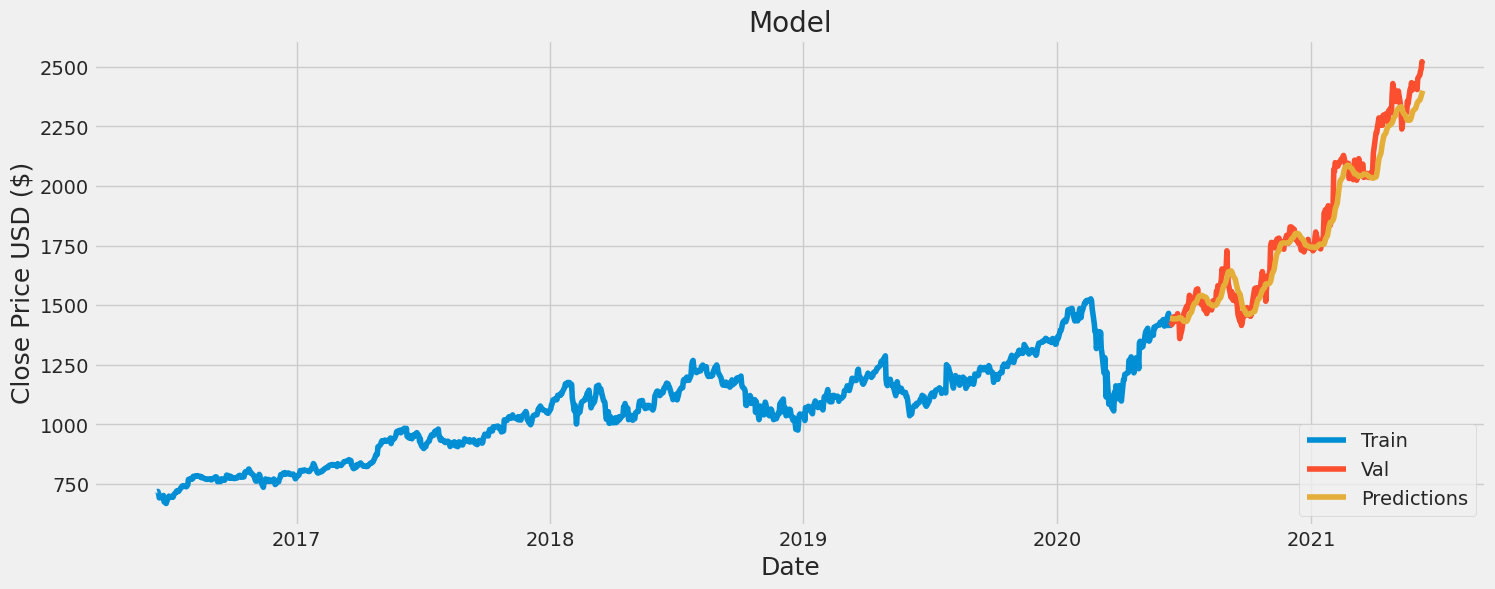

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['date'].iloc[:1006],train['close'])
plt.plot(df['date'].iloc[1006:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [44]:
valid

,close,Predictions
1006,1413.18,1444.636841
1007,1419.85,1444.139282
1008,1442.72,1442.782349
1009,1451.12,1442.203369
1010,1435.96,1442.674316
...,...,...
1253,2466.09,2360.849609
1254,2482.85,2369.276123
1255,2491.40,2378.610352
1256,2521.60,2388.431396


##**Conclusion:**
* Over the given time period, you can observe the general trend of the closing prices. Prices are increasing that means its a bullish trend.
* This Closing Prices are dependent with specific events in the market or for the company.
* R-squared (R2) score of 0.95 indicates a very good fit for your model.
* RMSE of 69.95 suggests LSMT can be a good model to predict stock market closing prices with great accuracy.  